In [29]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta, datetime

import os
import json
import xmitgcm as xm

### Import particles results

In [24]:
xr_output = xr.open_zarr("eddy_analysis.zarr")

### Check particles trajectories

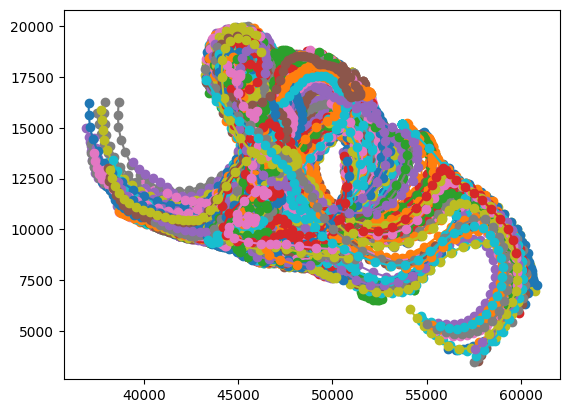

In [25]:
plt.plot(xr_output["lon"].T, xr_output["lat"].T, marker="o");

### Import MITgcm results

In [4]:
model = 'leman_sep2021'
with open('config.json', 'r') as file:
    config_plots = json.load(file)[os.uname().nodename][model]

datapath = config_plots['datapath']
gridpath = config_plots['gridpath']
ref_date = config_plots['ref_date']
dt = config_plots['dt']

In [5]:
# load velocity data
data_vel  = xm.open_mdsdataset(datapath, delta_t=dt,
                            ignore_unknown_vars=True, grid_dir=gridpath, 
                            geometry="cartesian", calendar="standard", ref_date=ref_date, 
                            prefix="3Dsnaps", endian='<')

### FTLE

In [37]:
def get_ftle(first_date, ftle_type):
    if ftle_type == 'forward':
        ftle_file = f'../TBarrier/TBarrier/2D/work_space/results/24h_forward_ftle_geneva/FTLE Geneva {first_date.strftime("%Y-%m-%d_%H-%M-%S")} - {(first_date + timedelta(days=1)).strftime("%Y-%m-%d_%H-%M-%S")}.csv'
    elif ftle_type == 'backward':
        ftle_file = f'../TBarrier/TBarrier/2D/work_space/results/24.0h_backward_ftle_geneva/backward FTLE {first_date.strftime("%Y-%m-%d_%H-%M-%S")} - {(first_date - timedelta(days=1)).strftime("%Y-%m-%d_%H-%M-%S")}.csv'

    return pd.read_csv(ftle_file,header=None)

In [30]:
ftle_type = 'backward'
first_date = datetime(2021, 9, 3, 0, 30, 0)

In [31]:
if ftle_type == 'forward':
    ftle_file = f'../TBarrier/TBarrier/2D/work_space/results/24h_forward_ftle_geneva/FTLE Geneva {first_date.strftime("%Y-%m-%d_%H-%M-%S")} - {(first_date + timedelta(days=1)).strftime("%Y-%m-%d_%H-%M-%S")}.csv'
elif ftle_type == 'backward':
    ftle_file = f'../TBarrier/TBarrier/2D/work_space/results/24.0h_backward_ftle_geneva/backward FTLE {first_date.strftime("%Y-%m-%d_%H-%M-%S")} - {(first_date - timedelta(days=1)).strftime("%Y-%m-%d_%H-%M-%S")}.csv'

In [32]:
df_ftle = pd.read_csv(ftle_file,header=None)

### Plot everything together

In [33]:
date_start = xr_output.time.values[0,0]
z_start = xr_output['z'].values[0,0]

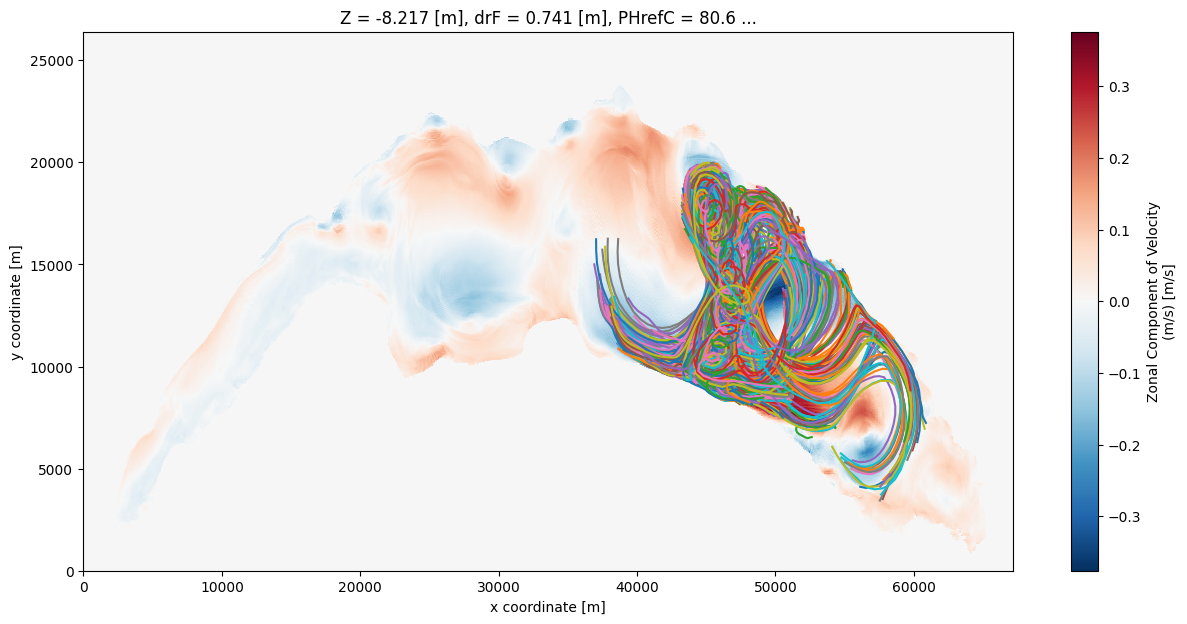

In [34]:
plt.figure(figsize=(15,7))
data_vel['UVEL'].sel(time=date_start, Z=z_start, method='nearest').plot();
plt.plot(xr_output["lon"].T, xr_output["lat"].T);
#plt.ylim(bottom=20500, top=22500)
#plt.xlim(left=40000, right=46000)
plt.savefig('./output/whole_lake_particles_traj')

Text(0.5, 1.0, '2021-09-03T03:30:00.000000000')

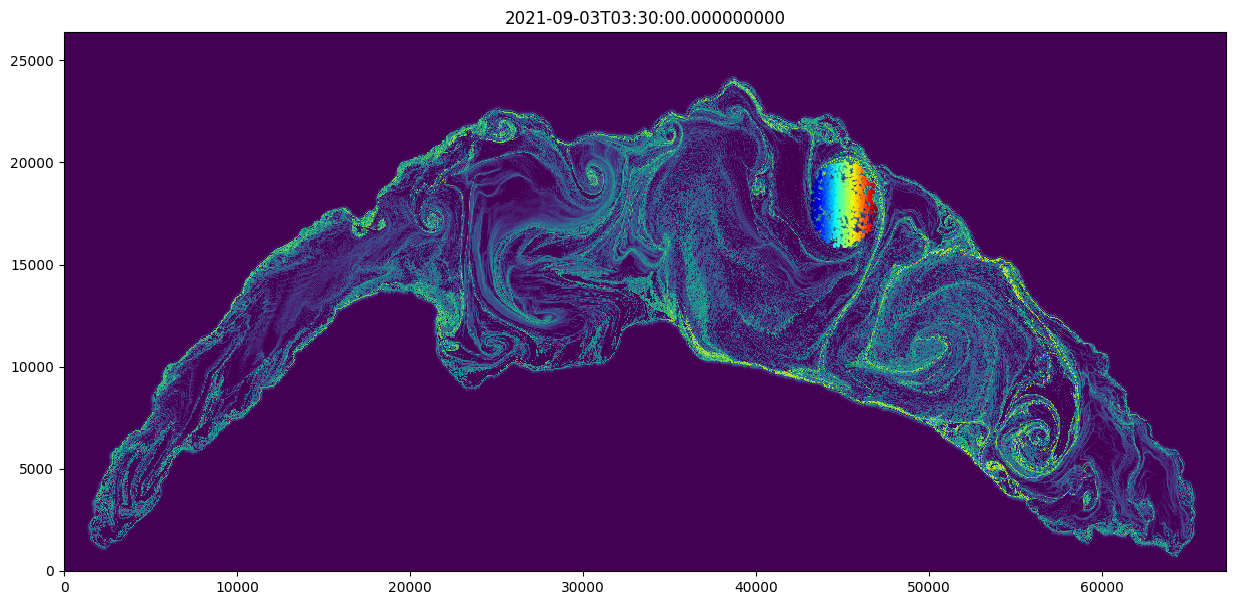

In [44]:
i=0
plt.figure(figsize=(15,7))
date_plot=xr_output.time.values[0,i]
plt.pcolormesh(data_vel.XG.values, data_vel.YG.values, get_ftle(pd.Timestamp(date_plot).to_pydatetime(), ftle_type))
plt.scatter(xr_output["lon"].isel(obs=i).T, xr_output["lat"].isel(obs=i).T, c=xr_output["lon"].isel(obs=0).T, cmap='jet', s=2);
#plt.ylim(bottom=20500, top=22500)
#plt.xlim(left=40000, right=56000)
plt.title(str(date_plot) + 'UTC')

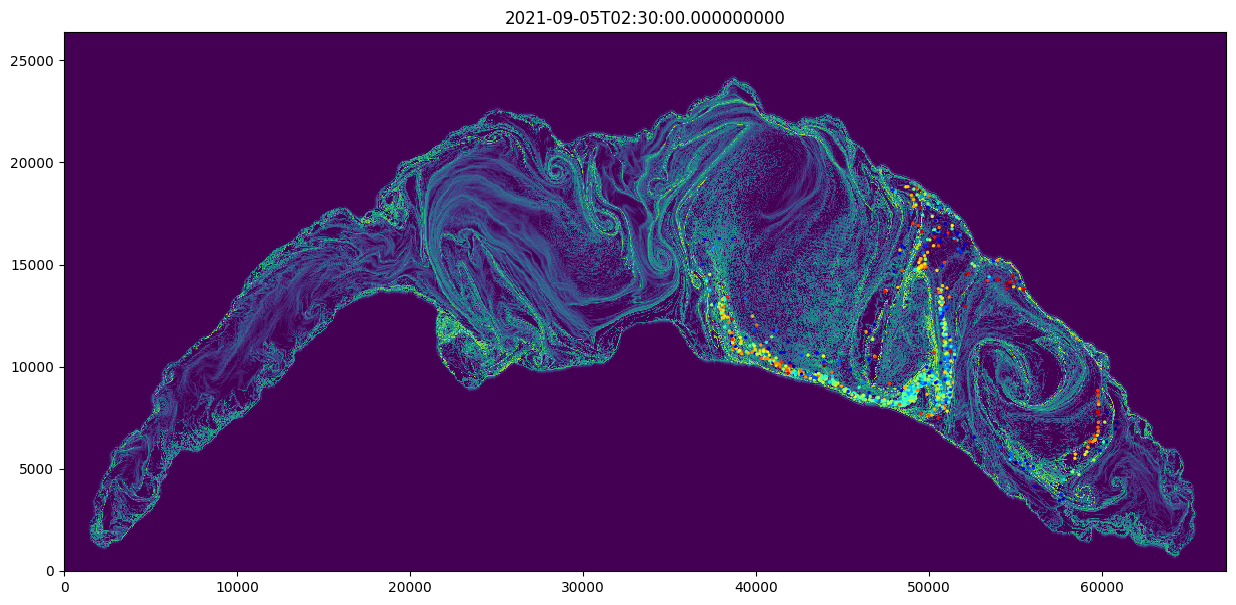

In [45]:
for i in range(0, len(xr_output.time[0].values)):
    plt.close('all')
    plt.figure(figsize=(15,7))
    date_plot=xr_output.time.values[0,i]
    plt.pcolormesh(data_vel.XG.values, data_vel.YG.values, get_ftle(pd.Timestamp(date_plot).to_pydatetime(), ftle_type))
    plt.scatter(xr_output["lon"].isel(obs=i).T, xr_output["lat"].isel(obs=i).T, c=xr_output["lon"].isel(obs=0).T, cmap='jet', s=2);
    #plt.ylim(bottom=20500, top=22500)
    #plt.xlim(left=40000, right=56000)
    plt.title(str(date_plot) + 'UTC')
    plt.savefig(f'./output/{str(i).zfill(3)}_eddy_analysis')